In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.neighbors import KDTree
import plotly.express as px
from sklearn.cluster import SpectralClustering
from spectral_clustering import SpectralClustering

In [20]:
%reload_ext autoreload
%autoreload 2

In [21]:
def make_simple_clusters(n=100, noise=0.05):
    
    half = round(n/2)
    x_noise_1 = np.random.normal(0, noise, half)
    y_noise_1 = np.random.normal(0, noise, n-half)
    x_noise_2 = np.random.normal(1, noise, half)
    y_noise_2 = np.random.normal(1, noise, n-half)

    x = np.concatenate([x_noise_1, x_noise_2])
    y = np.concatenate([y_noise_1, y_noise_2])
    points = np.zeros((n,2))
    labels = np.zeros((n))
    points[:,0] = x
    points[:,1] = y
    labels[half:] = 1

    return points, labels

In [25]:
#X, y = make_moons(200, noise=0.05)
X, y = make_simple_clusters(200, noise=0.1)

In [26]:
x, y = X[:,0], X[:,1]


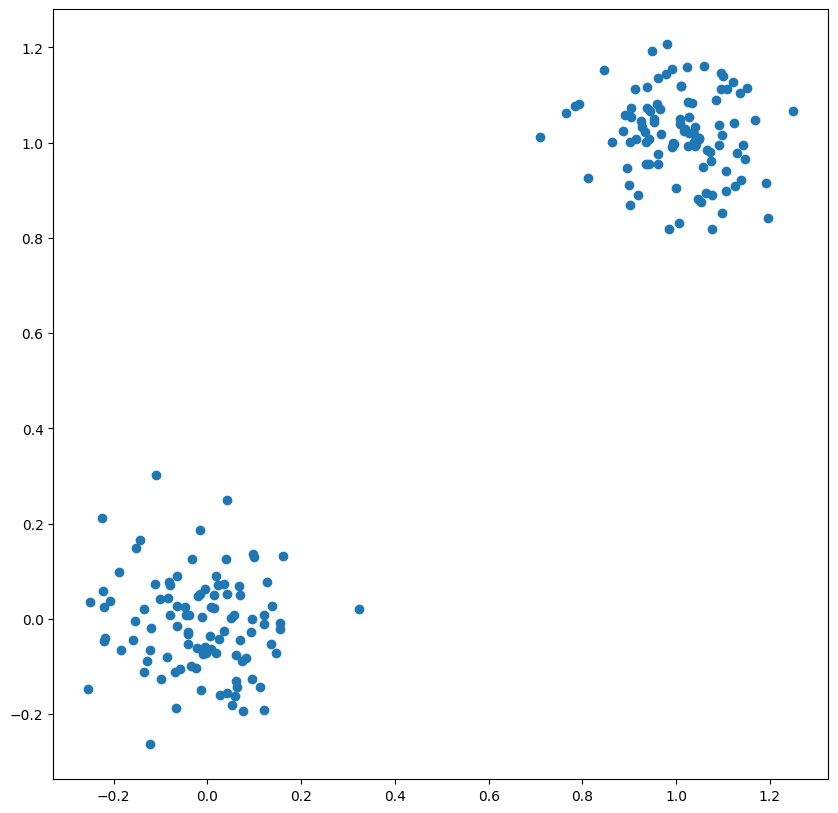

In [27]:
plt.figure(figsize=(10,10))
plt.plot(x, y, 'o')
plt.show()

In [36]:
# sc = SpectralClustering(n_clusters=2)
# labels = sc.fit_predict(X)

In [43]:
sc = SpectralClustering(k=10, affinity="rbf")
labels = sc.fit(X)

In [44]:
fig = px.scatter(x=x, y=y, color=labels)
fig.show()